# Probability and statistics

In some form or another, machine learning is all about making predictions.  
We might want to predict the probability of a patient suffering a heart attack in the next year, given their clinical history.  
In anomaly detection, we might want to assess how likely a set of readings from an airplane’s jet engine would be, were it operating normally.  
In reinforcement learning, we want an agent to act intelligently in an environment.  
This means we need to think about the probability of getting a high reward under each of the available action.  
And when we build recommender systems we also need to think about probability.  
For example, if we hypothetically worked for a large online bookseller, we might want to estimate the probability that a particular user would buy a particular book, if prompted.  

For this we need to use the language of probability and statistics.  
Entire courses, majors, theses, careers, and even departments, are devoted to probability.  
So our goal here isn’t to teach the whole subject.  
Instead we hope to get you off the ground, to teach you just enough that you know everything necessary to start building your first machine learning models and to have enough of a flavor for the subject that you can begin to explore it on your own if you wish.  
We’ve talked a lot about probabilities so far without articulating what precisely they are or giving a concrete example.  
Let’s get more serious by considering the problem of distinguishing cats and dogs based on photographs.  
This might sound simpler but it’s actually a formidable challenge.  
To start with, the difficulty of the problem may depend on the resolution of the image.

![](img/cats_and_dogs.png)

While it’s easy for humans to recognize cats and dogs at 320 pixel resolution, it becomes challenging at 40 pixels and next to impossible at 20 pixels.  
In other words, our ability to tell cats and dogs apart at a large distance (and thus low resolution) might approach uninformed guessing.  
Probability gives us a formal way of reasoning about our level of certainty.  
If we are completely sure that the image depicts a cat, we say that the probability that the corresponding label l is cat, denoted $P(l=\mathrm{cat})$ equals 1.0.  
If we had no evidence to suggest that $l=\mathrm{cat}$ or that $l=\mathrm{dog}$, then we might say that the two possibilities were equally likely expressing this as $P(l=\mathrm{cat})=0.5$.  
If we were reasonably confident, but not sure that the image depicted a cat, we might assign a probability $.5<P(l=\mathrm{cat})<1.0$.

Now consider a second case: given some weather monitoring data, we want to predict the probability that it will rain in Taipei tomorrow.  
If it’s summertime, the rain might come with probability $.5$.  
In both cases, we have some value of interest.  
And in both cases we are uncertain about the outcome.  
But there’s a key difference between the two cases.  
In this first case, the image is in fact either a dog or a cat, we just don’t know which.  
In the second case, the outcome may actually be a random event, if you believe in such things (and most physicists do).  
So probability is a flexible language for reasoning about our level of certainty, and it can be applied effectively in a broad set of contexts.  

## Basic probability theory

Say that we cast a die and want to know what the chance is of seeing a $1$ rather than another digit.  
If the die is fair, all six outcomes ${X} = \{1, \ldots, 6\}$ are equally likely to occur, hence we would see a $1$ in $1$ out of $6$ cases.  
Formally we state that 1 occurs with probability $\frac{1}{6}$.  
For a real die that we receive from a factory, we might not know those proportions and we would need to check whether it is tainted.  
The only way to investigate the die is by casting it many times and recording the outcomes.  
For each cast of the die, we’ll observe a value $\{1, 2, \ldots, 6\}$.  

Given these outcomes, we want to investigate the probability of observing each outcome.  
One natural approach for each value is to take the individual count for that value and to divide it by the total number of tosses.  
This gives us an estimate of the probability of a given event.  
The law of large numbers tell us that as the number of tosses grows this estimate will draw closer and closer to the true underlying probability.  
Before going into the details of what’s going here, let’s try it out.  
We can start by importing the necessary packages:

In [101]:
import mxnet as mx
from mxnet import nd

Next, we’ll want to be able to cast the die.  
In statistics we call this process of drawing examples from probability distributions *sampling*.  
The distribution which assigns probabilities to a number of discrete choices is called the *multinomial distribution*.  
We’ll give a more formal definition of *distribution* later, but at a high level, think of it as just an assignment of probabilities to events.  
In MXNet, we can sample from the multinomial distribution via the aptly named `nd.sample_multinomial` function.  
The function can be called in many ways, but we’ll focus on the simplest.  
To draw a single sample, we simply pass in a vector of probabilities.

In [102]:
probabilities = nd.ones(6) / 6
print(probabilities)
nd.sample_multinomial(probabilities)


[ 0.16666667  0.16666667  0.16666667  0.16666667  0.16666667  0.16666667]
<NDArray 6 @cpu(0)>



[2]
<NDArray 1 @cpu(0)>

If you run the line (`nd.sample_multinomial(probabilities)`) a bunch of times, you’ll find that you get out random values each time.  
As with estimating the fairness of a die, we often want to generate many samples from the same distribution.  
It would be really slow to do this with a Python `for` loop, so `sample_multinomial` supports drawing multiple samples at once, returning an array of independent samples in any shape we might desire.  

In [103]:
print(nd.sample_multinomial(probabilities, shape=(10)))
print(nd.sample_multinomial(probabilities, shape=(5,10)))


[4 0 5 5 3 2 5 3 1 4]
<NDArray 10 @cpu(0)>

[[3 0 4 0 4 3 4 3 1 4]
 [5 0 0 2 1 4 2 1 3 5]
 [1 5 5 2 2 0 0 0 4 0]
 [5 2 2 2 3 4 3 3 4 2]
 [0 0 5 0 4 4 0 5 3 1]]
<NDArray 5x10 @cpu(0)>


Now that we know how to sample rolls of a die, we can simulate 1000 rolls.

In [104]:
rolls = nd.sample_multinomial(probabilities, shape=(1000))
rolls


[0 3 2 4 3 4 3 3 5 0 1 0 5 5 2 4 4 3 4 3 4 1 4 3 3 0 4 5 5 3 5 0 1 5 5 3 0
 1 3 0 2 5 1 2 3 1 0 3 3 1 5 1 0 5 1 1 3 3 2 1 2 2 2 3 2 4 2 0 0 1 1 4 0 1
 2 0 5 1 0 4 3 3 2 5 5 5 2 4 4 5 2 1 3 2 4 1 5 4 0 4 3 2 0 3 0 0 4 5 5 2 3
 5 0 0 0 0 1 2 2 1 0 4 5 4 2 3 5 5 5 5 3 1 3 1 1 4 1 0 0 1 3 5 0 3 2 1 1 4
 4 1 2 3 5 1 1 4 5 5 3 2 0 3 3 5 1 2 4 4 3 0 0 0 2 5 5 3 2 2 4 2 0 0 5 0 3
 4 5 3 3 5 4 3 5 2 4 3 3 3 2 2 0 3 2 2 2 5 4 1 1 1 4 4 0 4 5 3 4 4 2 2 1 1
 1 3 3 3 2 5 4 2 5 0 1 4 3 2 2 1 0 3 3 0 2 0 0 3 2 0 0 3 3 1 3 5 3 3 5 4 5
 2 4 5 3 0 1 5 0 0 0 0 1 5 1 3 3 0 3 0 2 0 4 2 4 5 4 2 3 3 0 5 2 1 2 4 2 5
 0 1 3 0 1 3 0 5 3 5 5 1 0 5 0 2 3 5 3 0 0 2 0 3 5 3 2 5 0 1 0 0 3 2 1 0 0
 5 3 3 0 1 0 0 0 3 0 4 4 2 0 4 0 4 2 0 0 4 4 3 2 5 5 0 0 1 5 3 0 5 5 1 1 5
 3 5 0 0 4 5 1 1 5 3 3 4 1 1 1 0 1 4 4 0 2 0 1 4 5 0 4 4 3 5 4 2 0 3 4 5 1
 5 4 1 5 0 4 1 3 1 4 2 2 1 1 5 0 3 4 0 0 2 2 3 4 5 5 2 3 5 1 4 2 0 4 4 1 0
 4 5 4 4 3 1 5 1 1 2 3 3 5 1 4 5 4 0 1 5 3 1 1 0 3 3 3 2 3 1 3 1 4 4 4 2 0
 2 5 0 2 4 1 3 5 4 4 3 2

Now let's tally the results of each of the 1000 rolls and count how many times each number was rolled.

In [105]:
counts = nd.zeros((6, 1000))
totals = nd.zeros(6)
for i, roll in enumerate(rolls):
    totals[int(roll.asscalar())] += 1
    counts[:, i] = totals
    
print(totals)


[ 181.  173.  149.  176.  158.  163.]
<NDArray 6 @cpu(0)>


Now we can calculate the percentage of the total that each number has after 1000 rolls.

In [106]:
totals / 1000


[ 0.18099999  0.17299999  0.149       0.176       0.15800001  0.163     ]
<NDArray 6 @cpu(0)>

If you run the numbers multiple times, you will find that the lowest estimated probability for any of the numbers is about .15 and the highest estimated probability is 0.188.  
Because we generated the data from a fair die, we know that each number actually has probability of 1/6, roughly .167, so these estimates are pretty good.  
We can also visualize how these probabilities converge over time towards reasonable estimates.  

To start let’s take a look at the `counts` array which has shape `(6, 1000)`.  
For each time step (out of 1000), counts, says how many times each of the numbers has shown up.  
So we can normalize each $j$-th column of the counts vector by the number of tosses to give the current estimated probabilities at that time.  
The counts object looks like this:

In [107]:
counts


[[   1.    1.    1. ...,  181.  181.  181.]
 [   0.    0.    0. ...,  172.  172.  173.]
 [   0.    0.    1. ...,  149.  149.  149.]
 [   0.    1.    1. ...,  175.  176.  176.]
 [   0.    0.    0. ...,  158.  158.  158.]
 [   0.    0.    0. ...,  163.  163.  163.]]
<NDArray 6x1000 @cpu(0)>

When we normalize the number of die rolls, we get:

In [108]:
x = nd.arange(1000).reshape((1,1000)) + 1
estimates = counts / x
estimates[:,0]


[ 1.  0.  0.  0.  0.  0.]
<NDArray 6 @cpu(0)>

In [109]:
estimates[:,1]


[ 0.5  0.   0.   0.5  0.   0. ]
<NDArray 6 @cpu(0)>

In [110]:
estimates[:,10]


[ 0.18181819  0.09090909  0.09090909  0.36363637  0.18181819  0.09090909]
<NDArray 6 @cpu(0)>

In [111]:
estimates[:,50]


[ 0.15686275  0.13725491  0.07843138  0.27450982  0.15686275  0.19607843]
<NDArray 6 @cpu(0)>

In [112]:
estimates[:,100]


[ 0.14851485  0.16831683  0.14851485  0.20792079  0.15841584  0.16831683]
<NDArray 6 @cpu(0)>

As you can see, after the first toss of the die, we get the extreme estimate that one of the numbers will be rolled with probability 1.0 and that the others have probability 0.  
After 100 rolls, things already look a bit more reasonable.  
We can visualize this convergence by using the plotting package `matplotlib`.  

In [113]:
from matplotlib import pyplot as plt

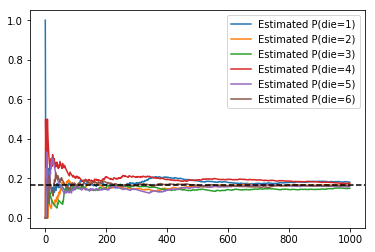

In [114]:
plt.plot(estimates[0, :].asnumpy(), label="Estimated P(die=1)")
plt.plot(estimates[1, :].asnumpy(), label="Estimated P(die=2)")
plt.plot(estimates[2, :].asnumpy(), label="Estimated P(die=3)")
plt.plot(estimates[3, :].asnumpy(), label="Estimated P(die=4)")
plt.plot(estimates[4, :].asnumpy(), label="Estimated P(die=5)")
plt.plot(estimates[5, :].asnumpy(), label="Estimated P(die=6)")
plt.axhline(y=0.16666, color='black', linestyle='dashed')
plt.legend()
plt.show()

Each solid curve corresponds to one of the six values of the die and gives our estimated probability that the die turns up that value as assessed after each of the 1000 turns.  
The dashed black line gives the true underlying probability.  
As we get more data, the solid curves converge towards the true answer.  
In our example of casting a die, we introduced the notion of a **random variable**.  
A random variable, which we denote here as $X$, can be pretty much any quantity that is not determistic.  
Random variables could take one value among a set of possibilites.  
We denote sets with brackets, like $\{\mathrm{cat}, \mathrm{dog}, \mathrm{rabbit}\}$.  
The items contained in the set are called *elements*, and we can say that an element $x$ is *in* the set $S$, by writing $x \in S$.  
The symbol $\in$ is read as "in" and denotes membership.  
For instance, we could truthfully say $\mathrm{dog} \in \{\mathrm{cat}, \mathrm{dog}, \mathrm{rabbit}\}$.  
When dealing with the rolls of die, we are concerned with a variable $X \in \{1, 2, 3, 4, 5, 6\}$.  

Note that there is a subtle difference between **discrete** random variables, like the sides of a dice, and **continuous** ones, like the weight and the height of a person.  
There’s little point in asking whether two people have exactly the same height.  
If we take precise enough measurements you’ll find that no two people on the planet have the exact same height.  
In fact, if we take a fine enough measurement, you will not have the same height when you wake up and when you go to sleep.  
So there’s no purpose in asking about the probability that some one is 2.00139278291028719210196740527486202 meters tall.  
The probability is 0.  
It makes more sense in this case to ask whether someone’s height falls into a given interval, say between 1.99 and 2.01 meters.  
In these cases we quantify the likelihood that we see a value as a density.  
The height of exactly 2.0 meters has no probability, but nonzero density.  
Between any two different heights we have nonzero probability.


There are a few important axioms of probability that you'll want to remember:  
* For any event $z$, the probability is never negative, i.e. $\Pr(Z=z) \geq 0$.  
* For any two events $Z=z$ and $X=x$ the union is no more likely than the sum of the individual events, i.e. $\Pr(Z=z \cup X=x) \leq \Pr(Z=z) + \Pr(X=x)$.  
* For any random variable, the probabilities of all the values it can take must sum to 1 $\sum_{i=1}^n P(Z=z_i) = 1$.  
* For any two mutually exclusive events $Z=z$ and $X=x$, the probability that either happens is equal to the sum of their individual probabilities that $\Pr(Z=z \cup X=x) = \Pr(Z=z) + \Pr(X=z)$.

## Dealing with multiple random variables